# Fandom Stats and Genre Writing

#### Yvonne Gonzales
#### Course: Digital Humanities 100 Summer 2021
#### Instructor: Adam Anderson

## Dataset

Using [a webscraper by UC Berkeley graduate student Sarah Sterman and Stanford student Jingyi Li](https://github.com/radiolarian/AO3Scraper), I collected the data and full text from the top 3.5k works (aka "fics"), as sorted by likes (or as Ao3 calls them, kudos) of fanfiction on the popular fanfiction website [Archive of Our Own](https://archiveofourown.org/).

## Importing Libraries and Navigating Files Structure

In [92]:
import os
import pandas as pd
import nltk

nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")
nltk.download("wordnet")
from nltk.corpus import stopwords

import matplotlib
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yvonnegonzales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yvonnegonzales/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yvonnegonzales/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yvonnegonzales/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
%pwd

'/Users/yvonnegonzales/Desktop/DH100/Notebook'

In [5]:
os.chdir("../AO3Scraper")
%pwd

'/Users/yvonnegonzales/Desktop/DH100/AO3Scraper'

## Importing the Dataset

In [6]:
top_fics = pd.read_csv("fanfics.csv")
top_fics.head()

,work_id,title,author,rating,category,fandom,relationship,character,additional tags,language,...,status date,words,chapters,comments,kudos,bookmarks,hits,all_kudos,all_bookmarks,body
0,2080878,I Am Groot,['sherlocksmyth'],Explicit,NaN,"Guardians of the Galaxy - All Media Types, Mar...",NaN,Groot (Marvel),NSFW,English,...,2014-08-04,1308,1/1,2931,98099,3842,848754,"['sddhdeheifis', 'XxSilentiumxX', 'Mai_3', 'Am...",[],I am Groot. I am Groot. I am Groot. I am Groot...
1,8337607,Yesterday Upon The Stair,['PitViperOfDoom'],Teen And Up Audiences,Gen,Pu nohiroakademia | Boku no Hero Academia | My...,"Midoriya Izuku & Yagi Toshinori | All Might, M...","Midoriya Izuku, Yagi Toshinori | All Might, Mi...","Alternate Universe - Canon Divergence, BAMF Mi...",English,...,2019-10-12,424070,60/60,19940,62276,14836,1765887,"['DaneyC', 'fucksimoncowell', 'TheBrotatoPatch...",[],"""Excuse me? Um, excuse me?""\n\nIt takes a whil..."
2,5096105,In Another Life,['LittleLuxray'],Teen And Up Audiences,M/M,Haikyuu!!,Akaashi Keiji/Bokuto Koutarou,"Akaashi Keiji, Bokuto Koutarou, Kozume Kenma, ...","Angst, Fluff and Angst, Alternate Universe - H...",English,...,2015-10-28,22995,1/1,5103,56228,9911,1966460,"['534316819191919estoyTouched_starved', 'voidn...",[],\n\n \n\nIt had been some time since Akaashi ...
3,10057010,All the Young Dudes,['MsKingBean89'],Mature,M/M,Harry Potter - J. K. Rowling,"Sirius Black/Remus Lupin, Sirius Black & Remus...","Remus Lupin, Sirius Black, James Potter, Lily ...","Marauders' Era, Marauders, Marauders Friendshi...",English,...,2018-11-12,526969,188/188,16214,48865,10704,2683521,"['liceeggs', 'JuliaTheStarsCollideDarling', 's...",[],"Saturday 7th August, 1971\n\nHe woke up in the..."
4,5457191,a reylo fic,['treezie'],General Audiences,F/M,"Star Wars - All Media Types, Star Wars Episode...",Kylo Ren/Rey (Star Wars),"Kylo Ren, Rey (Star Wars)","stan loona, #ReleaseTheRianJohnsonCut",English,...,2015-12-19,12,1/1,8093,47051,1814,304252,"['windowpane_rain', 'Giraffejuice', 'ew7756', ...",[],rey picks up kylo and dunks him into the garba...


In [7]:
top_fics.shape

(3585, 22)

In [8]:
# total word count of all fics

total_words = top_fics["words"].sum()
total_words

233805813

After importing my dataset, note that each row represents one fic, and I have 3,584 fics, along with all their data. The sum of word count of those fics is 233,805,813. That is going to be a lot of language analysis.

# Starting to clean the data

In [43]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from string import punctuation


In [25]:
# creating a list of just the body of the works

fic_text = top_fics["body"]
type(fic_text[3])

str

In [39]:
# this is my first test tokenizing a work before I set up a for loop

test_tokens = word_tokenize(fic_text[3])
print(test_tokens[:30])

['Saturday', '7th', 'August', ',', '1971', 'He', 'woke', 'up', 'in', 'the', 'dark', '.', 'It', 'was', 'too', 'hot', 'in', 'the', 'little', 'room', 'they', "'d", 'put', 'him', 'in', ',', 'being', 'early', 'August', '.']


In [106]:
for char in punctuation:
    test = fic_text[2].lower().replace(char, "")

In [107]:
test

' \n\n \n\nit had been some time since akaashi set foot into that hospital\n\nit was a dreary place for him a place he was not fond of but a place he was obligated to visit akaashis parents were intent on having him intern in a hospital nearby so that he could stockpile more things that would look good on his resume for future purposes\n\noften times however akaashi would disagree with his parents unhappy with the suggestions theyd given him but ultimately they would urge him to carry out the task that had been pushed on him and one way or another hed do it\n\nasking around here and there the male put little to no effort in finding out where he could go to sign up for what he didnt care nor did he think he would care in the near future akaashi was unhappy with where he was unhappy with what it was that he was doing he was wasting time asking for something that he did not want in the least\n\npointing a finger down the hall a small assistant nurse directed akaashi to a different desk on

In [105]:
test = test.replace("\n", " ")
test

'      it had been some time since akaashi set foot into that hospital  it was a dreary place for him a place he was not fond of but a place he was obligated to visit akaashis parents were intent on having him intern in a hospital nearby so that he could stockpile more things that would look good on his resume for future purposes  often times however akaashi would disagree with his parents unhappy with the suggestions theyd given him but ultimately they would urge him to carry out the task that had been pushed on him and one way or another hed do it  asking around here and there the male put little to no effort in finding out where he could go to sign up for what he didnt care nor did he think he would care in the near future akaashi was unhappy with where he was unhappy with what it was that he was doing he was wasting time asking for something that he did not want in the least  pointing a finger down the hall a small assistant nurse directed akaashi to a different desk one where he w

In [72]:
test = test.strip()
test

'it had been some time since akaashi set foot into that hospitalit was a dreary place for him a place he was not fond of but a place he was obligated to visit akaashis parents were intent on having him intern in a hospital nearby so that he could stockpile more things that would look good on his resume for future purposesoften times however akaashi would disagree with his parents unhappy with the suggestions theyd given him but ultimately they would urge him to carry out the task that had been pushed on him and one way or another hed do itasking around here and there the male put little to no effort in finding out where he could go to sign up for what he didnt care nor did he think he would care in the near future akaashi was unhappy with where he was unhappy with what it was that he was doing he was wasting time asking for something that he did not want in the leastpointing a finger down the hall a small assistant nurse directed akaashi to a different desk one where he would be able t

In [75]:
test = test.split()

In [76]:
no_stop_test = [word for word in test if word not in stopwords.words('english')]

In [77]:
no_stop_test

['time',
 'since',
 'akaashi',
 'set',
 'foot',
 'hospitalit',
 'dreary',
 'place',
 'place',
 'fond',
 'place',
 'obligated',
 'visit',
 'akaashis',
 'parents',
 'intent',
 'intern',
 'hospital',
 'nearby',
 'could',
 'stockpile',
 'things',
 'would',
 'look',
 'good',
 'resume',
 'future',
 'purposesoften',
 'times',
 'however',
 'akaashi',
 'would',
 'disagree',
 'parents',
 'unhappy',
 'suggestions',
 'theyd',
 'given',
 'ultimately',
 'would',
 'urge',
 'carry',
 'task',
 'pushed',
 'one',
 'way',
 'another',
 'hed',
 'itasking',
 'around',
 'male',
 'put',
 'little',
 'effort',
 'finding',
 'could',
 'go',
 'sign',
 'didnt',
 'care',
 'think',
 'would',
 'care',
 'near',
 'future',
 'akaashi',
 'unhappy',
 'unhappy',
 'wasting',
 'time',
 'asking',
 'something',
 'want',
 'leastpointing',
 'finger',
 'hall',
 'small',
 'assistant',
 'nurse',
 'directed',
 'akaashi',
 'different',
 'desk',
 'one',
 'would',
 'able',
 'find',
 'information',
 'subject',
 'blatantly',
 'thanked',
 '

In [87]:
more_stops = ["akaashi", "bokuto", "bokutos", "akaashis"]

no_stop_test = [word for word in test if word not in stopwords.words('english')]

In [88]:
no_stop_test = [word for word in no_stop_test if word not in more_stops]

In [89]:
from collections import Counter

test_freq = Counter(no_stop_test)
test_barplot = test_freq.most_common(20)
test_barplot

[('would', 118),
 ('eyes', 92),
 ('head', 92),
 ('one', 91),
 ('could', 81),
 ('back', 81),
 ('time', 77),
 ('hand', 77),
 ('looked', 70),
 ('like', 60),
 ('didnt', 59),
 ('hed', 57),
 ('words', 55),
 ('dont', 51),
 ('say', 50),
 ('around', 48),
 ('know', 47),
 ('kuroo', 47),
 ('turned', 45),
 ('face', 45)]

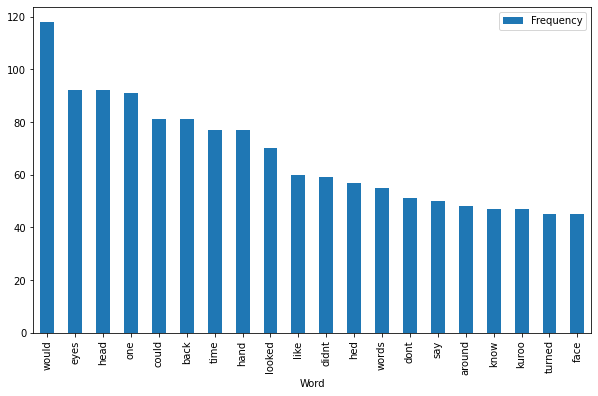

In [90]:
test_df = pd.DataFrame(data = test_barplot, 
                         columns = ["Word", "Frequency"])
test_df.plot.bar(x = "Word", y = "Frequency", figsize = (10,6));

test_df;

In [97]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
type(stemmer)

nltk.stem.porter.PorterStemmer

In [95]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
snowballer_stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()